In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install pycaret


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.6/483.6 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 15.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.1/70.1 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 61.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 64.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 70.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.2/185.2 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 19.4 

In [3]:
!git clone https://github.com/derevirn/pycaret-book.git

Cloning into 'pycaret-book'...
remote: Enumerating objects: 468, done.
remote: Counting objects: 100% (82/82), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 468 (delta 26), reused 65 (delta 12), pack-reused 386
Receiving objects: 100% (468/468), 63.12 MiB | 27.80 MiB/s, done.
Resolving deltas: 100% (187/187), done.


In [4]:
!rm -rf pycaret-book


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from pycaret.datasets import get_data
from pycaret.regression import *
mpl.rcParams['figure.dpi'] = 300

In [6]:
data = get_data('insurance')


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


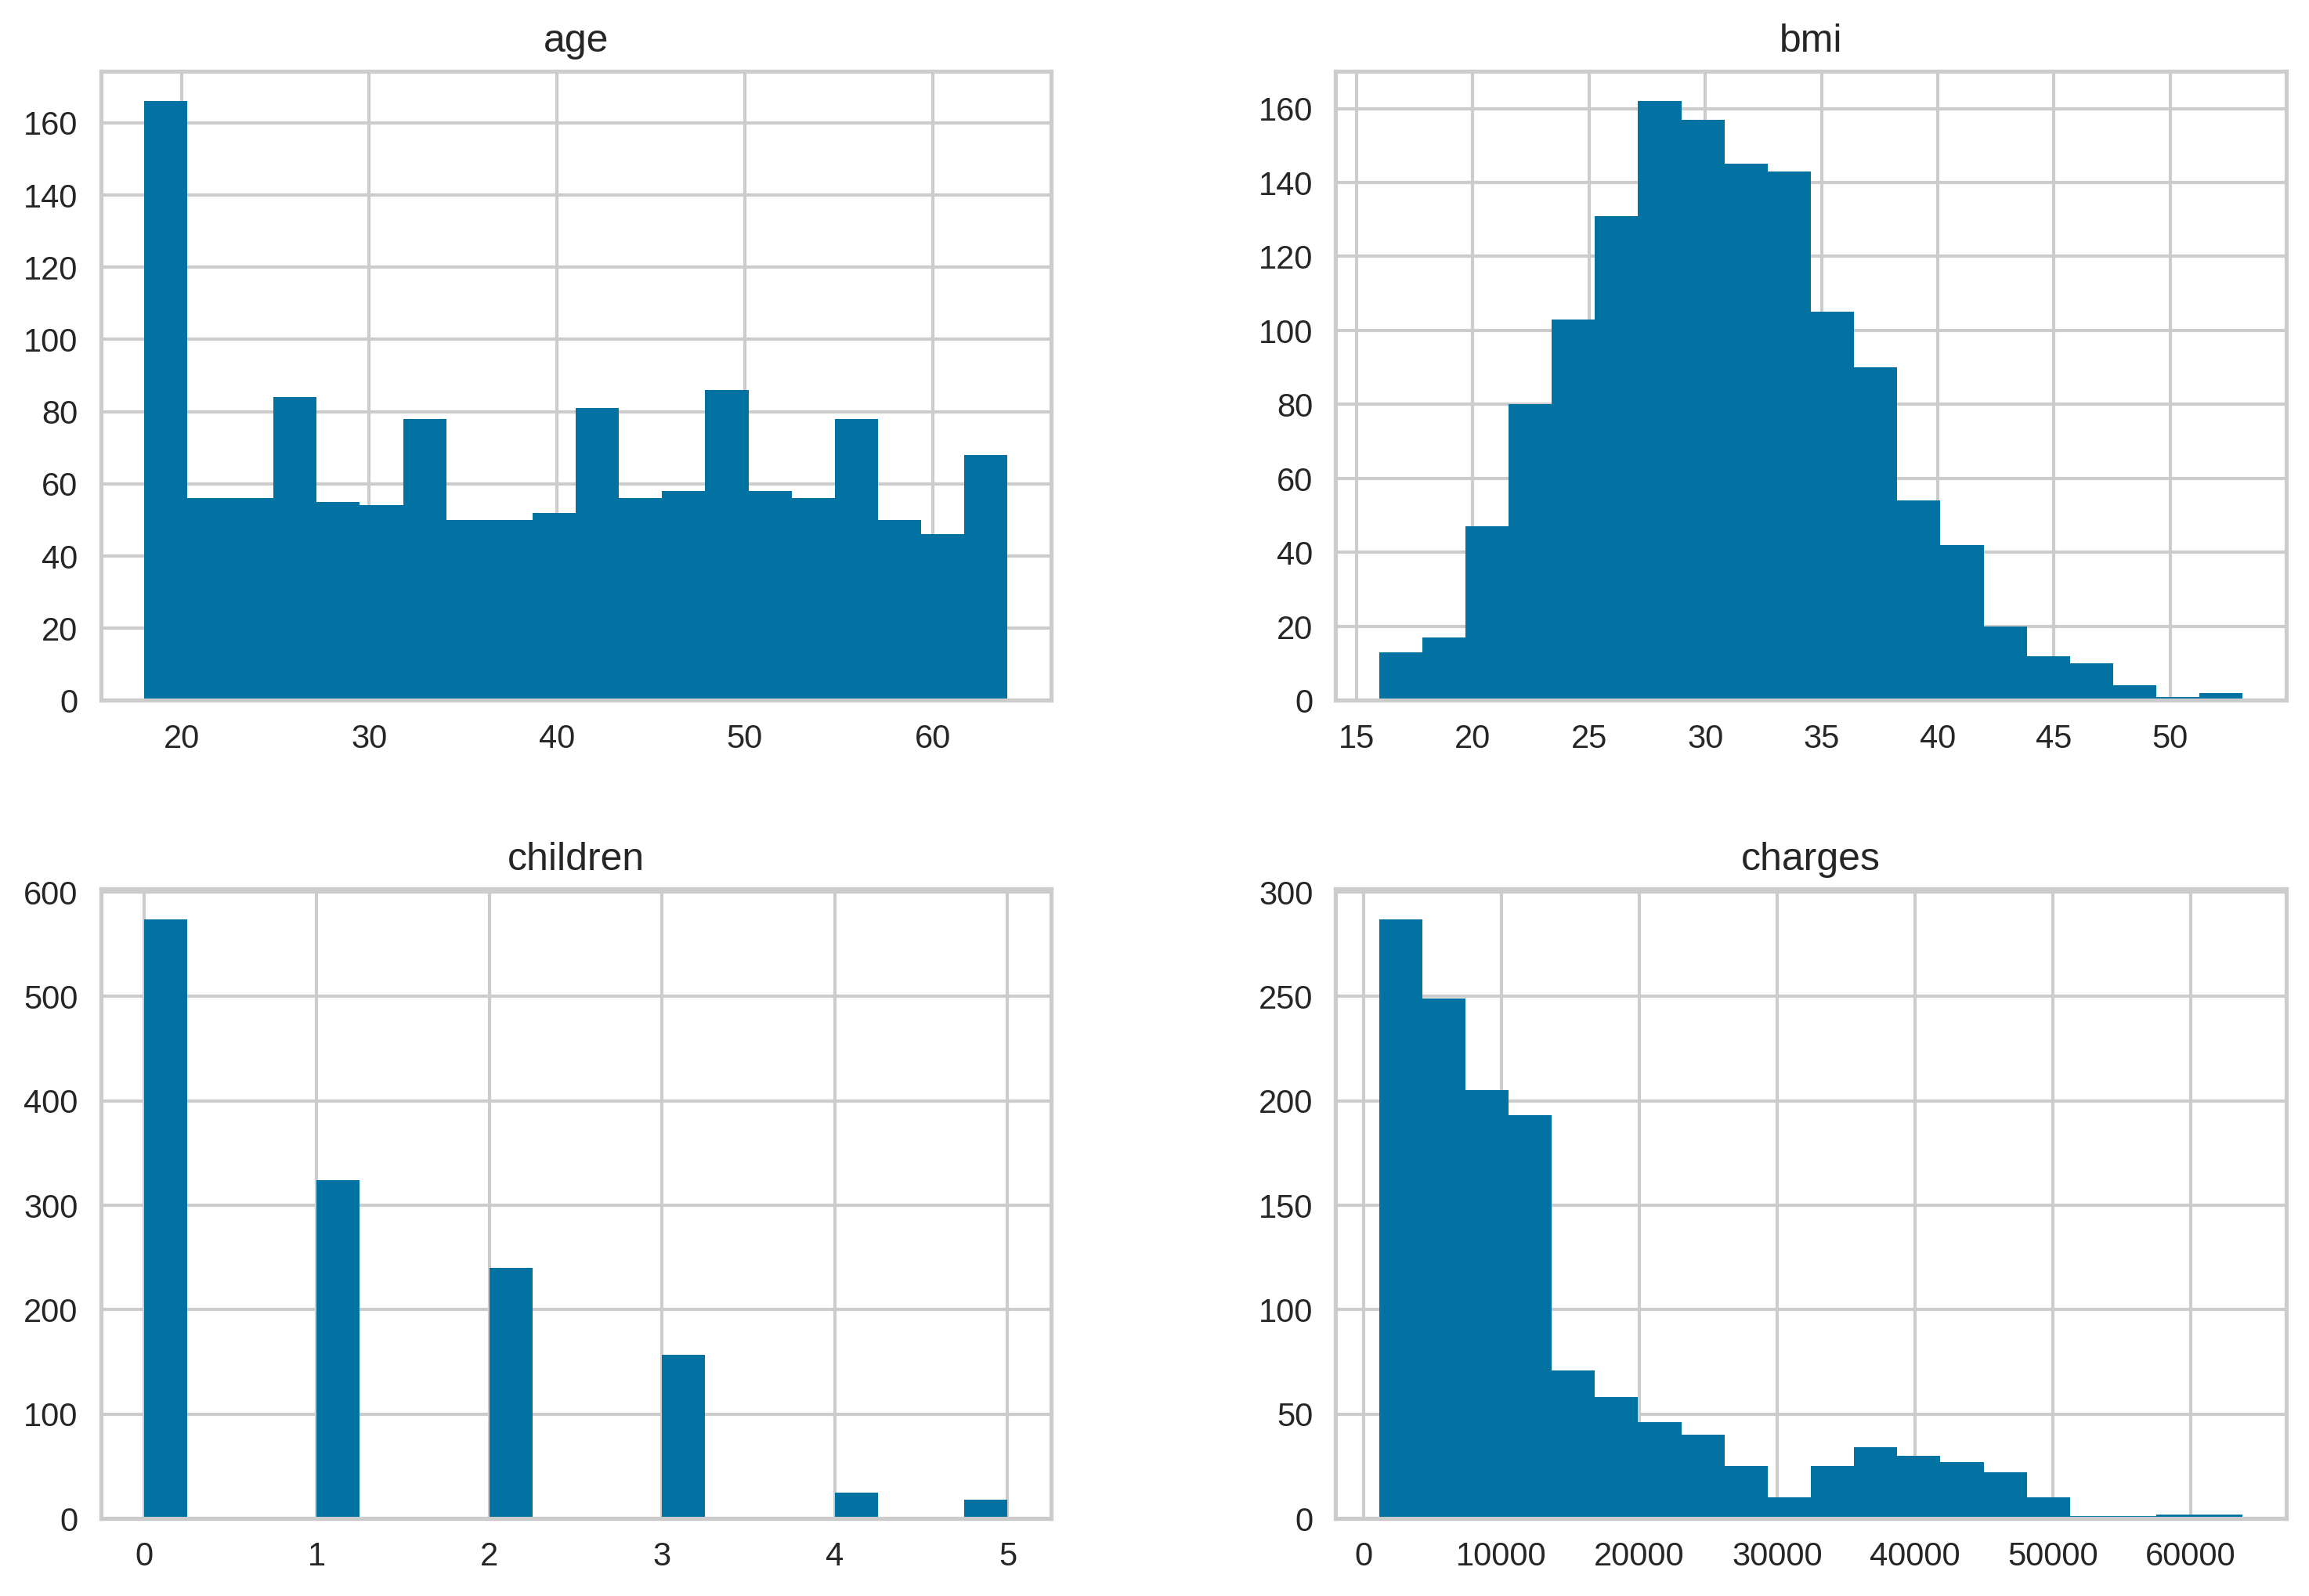

In [8]:
numeric = ['age', 'bmi', 'children', 'charges']

data[numeric].hist(bins=20,figsize=(12,8))
plt.show()

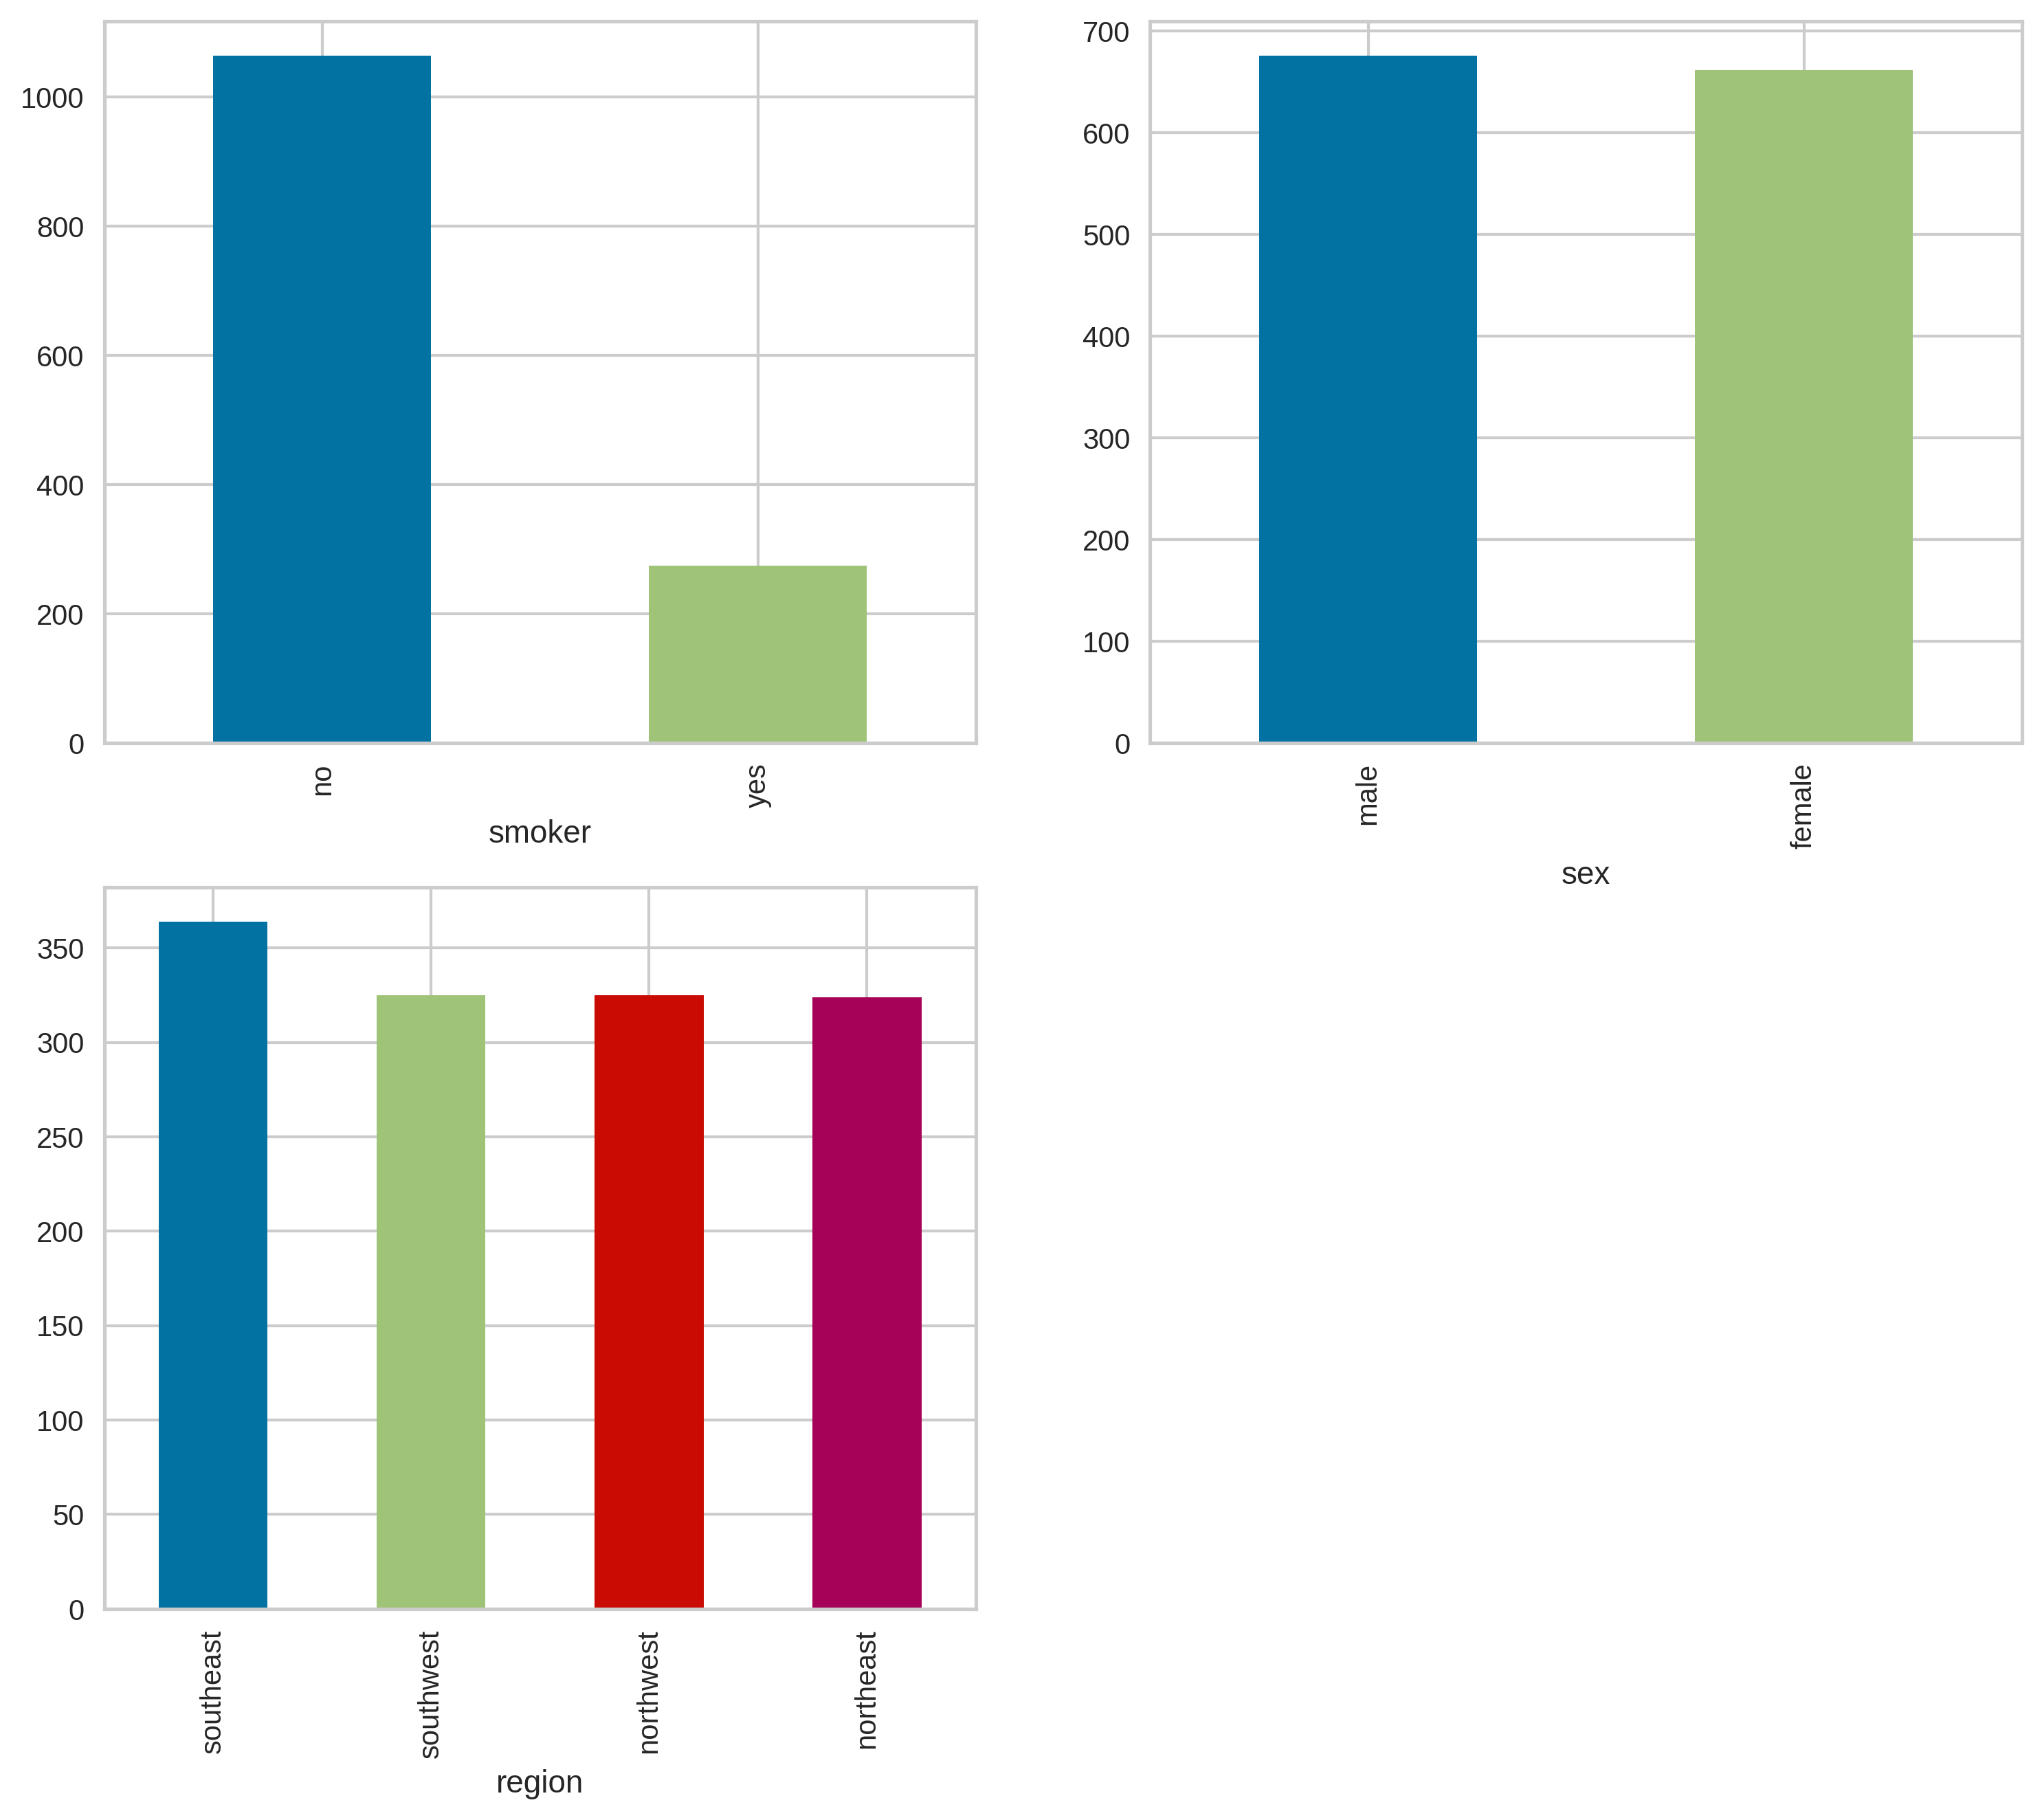

In [9]:
categorical = ['smoker', 'sex', 'region']

color = ['C0', 'C1', 'C2', 'C3']
fig, axes = plt.subplots(2, 2, figsize = (12,10))
axes[1,1].set_axis_off()

for ax, col in zip(axes.flatten(), categorical) :
    data[col].value_counts().plot(kind = 'bar', ax = ax, color = color)
    ax.set_xlabel(col)




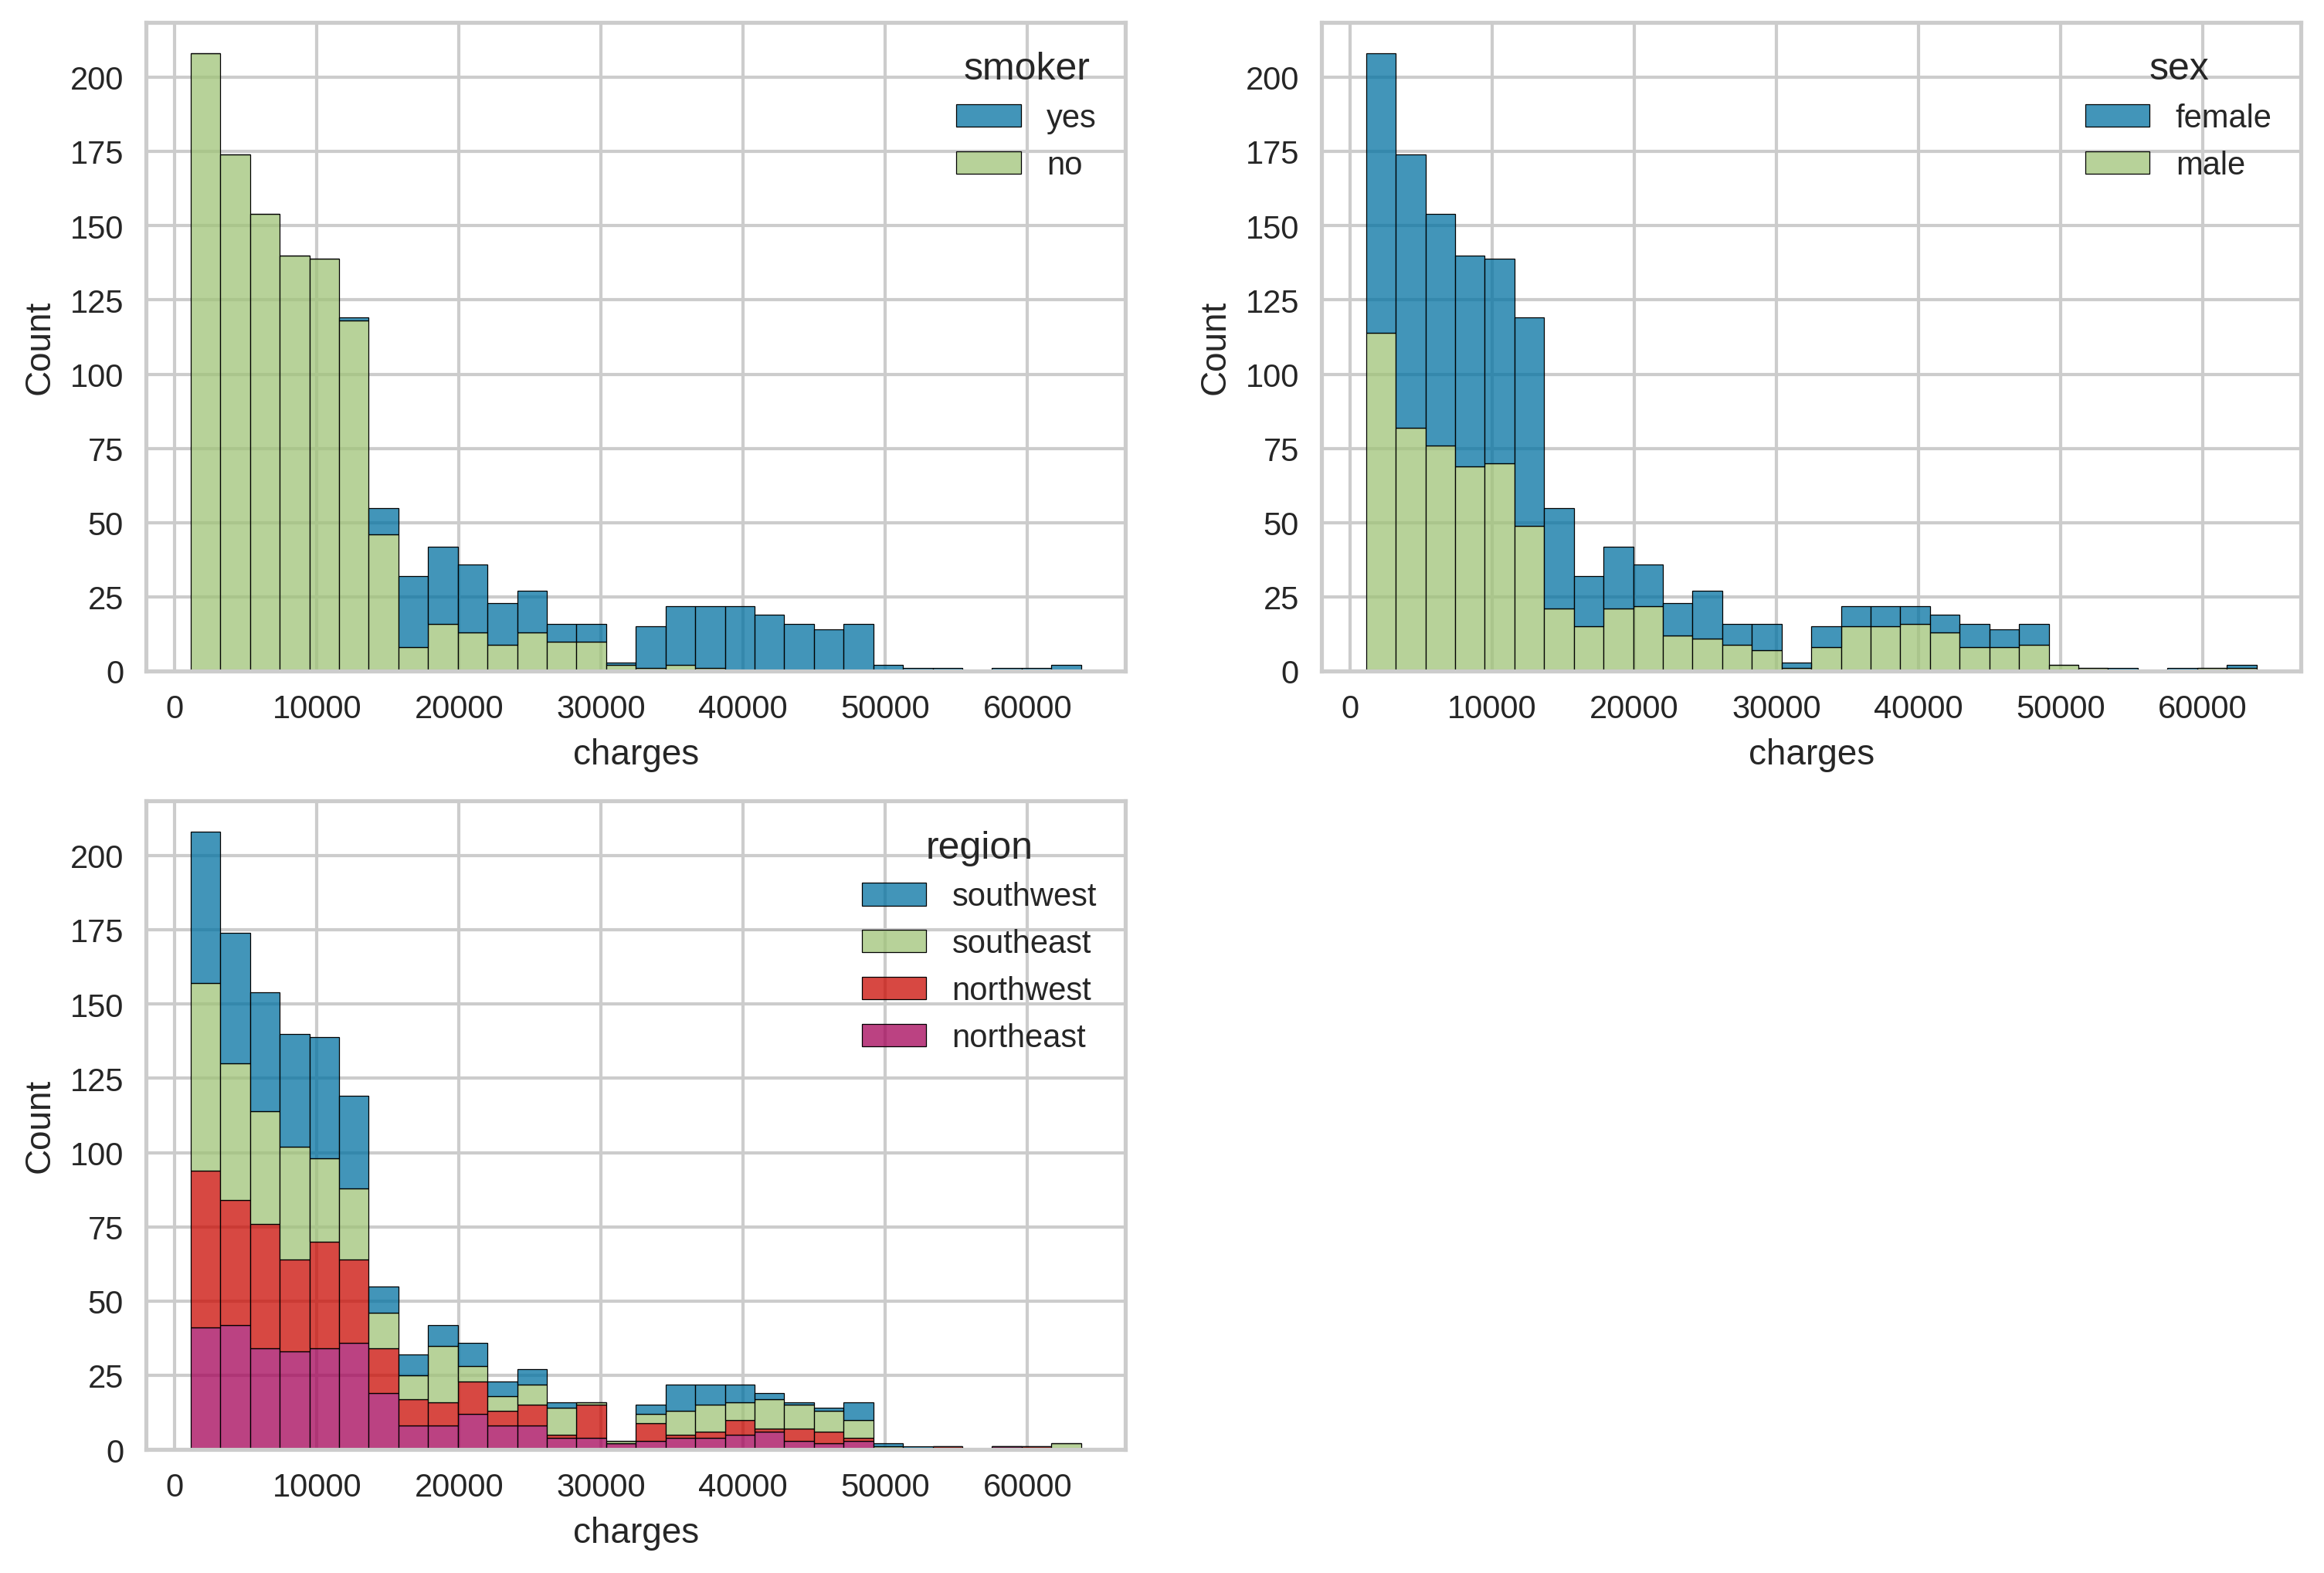

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(12,8))
axes[1,1].set_axis_off()
for ax, col in zip(axes.flatten(), categorical):
    sns.histplot(data, x='charges', hue=col, multiple='stack', ax=ax)

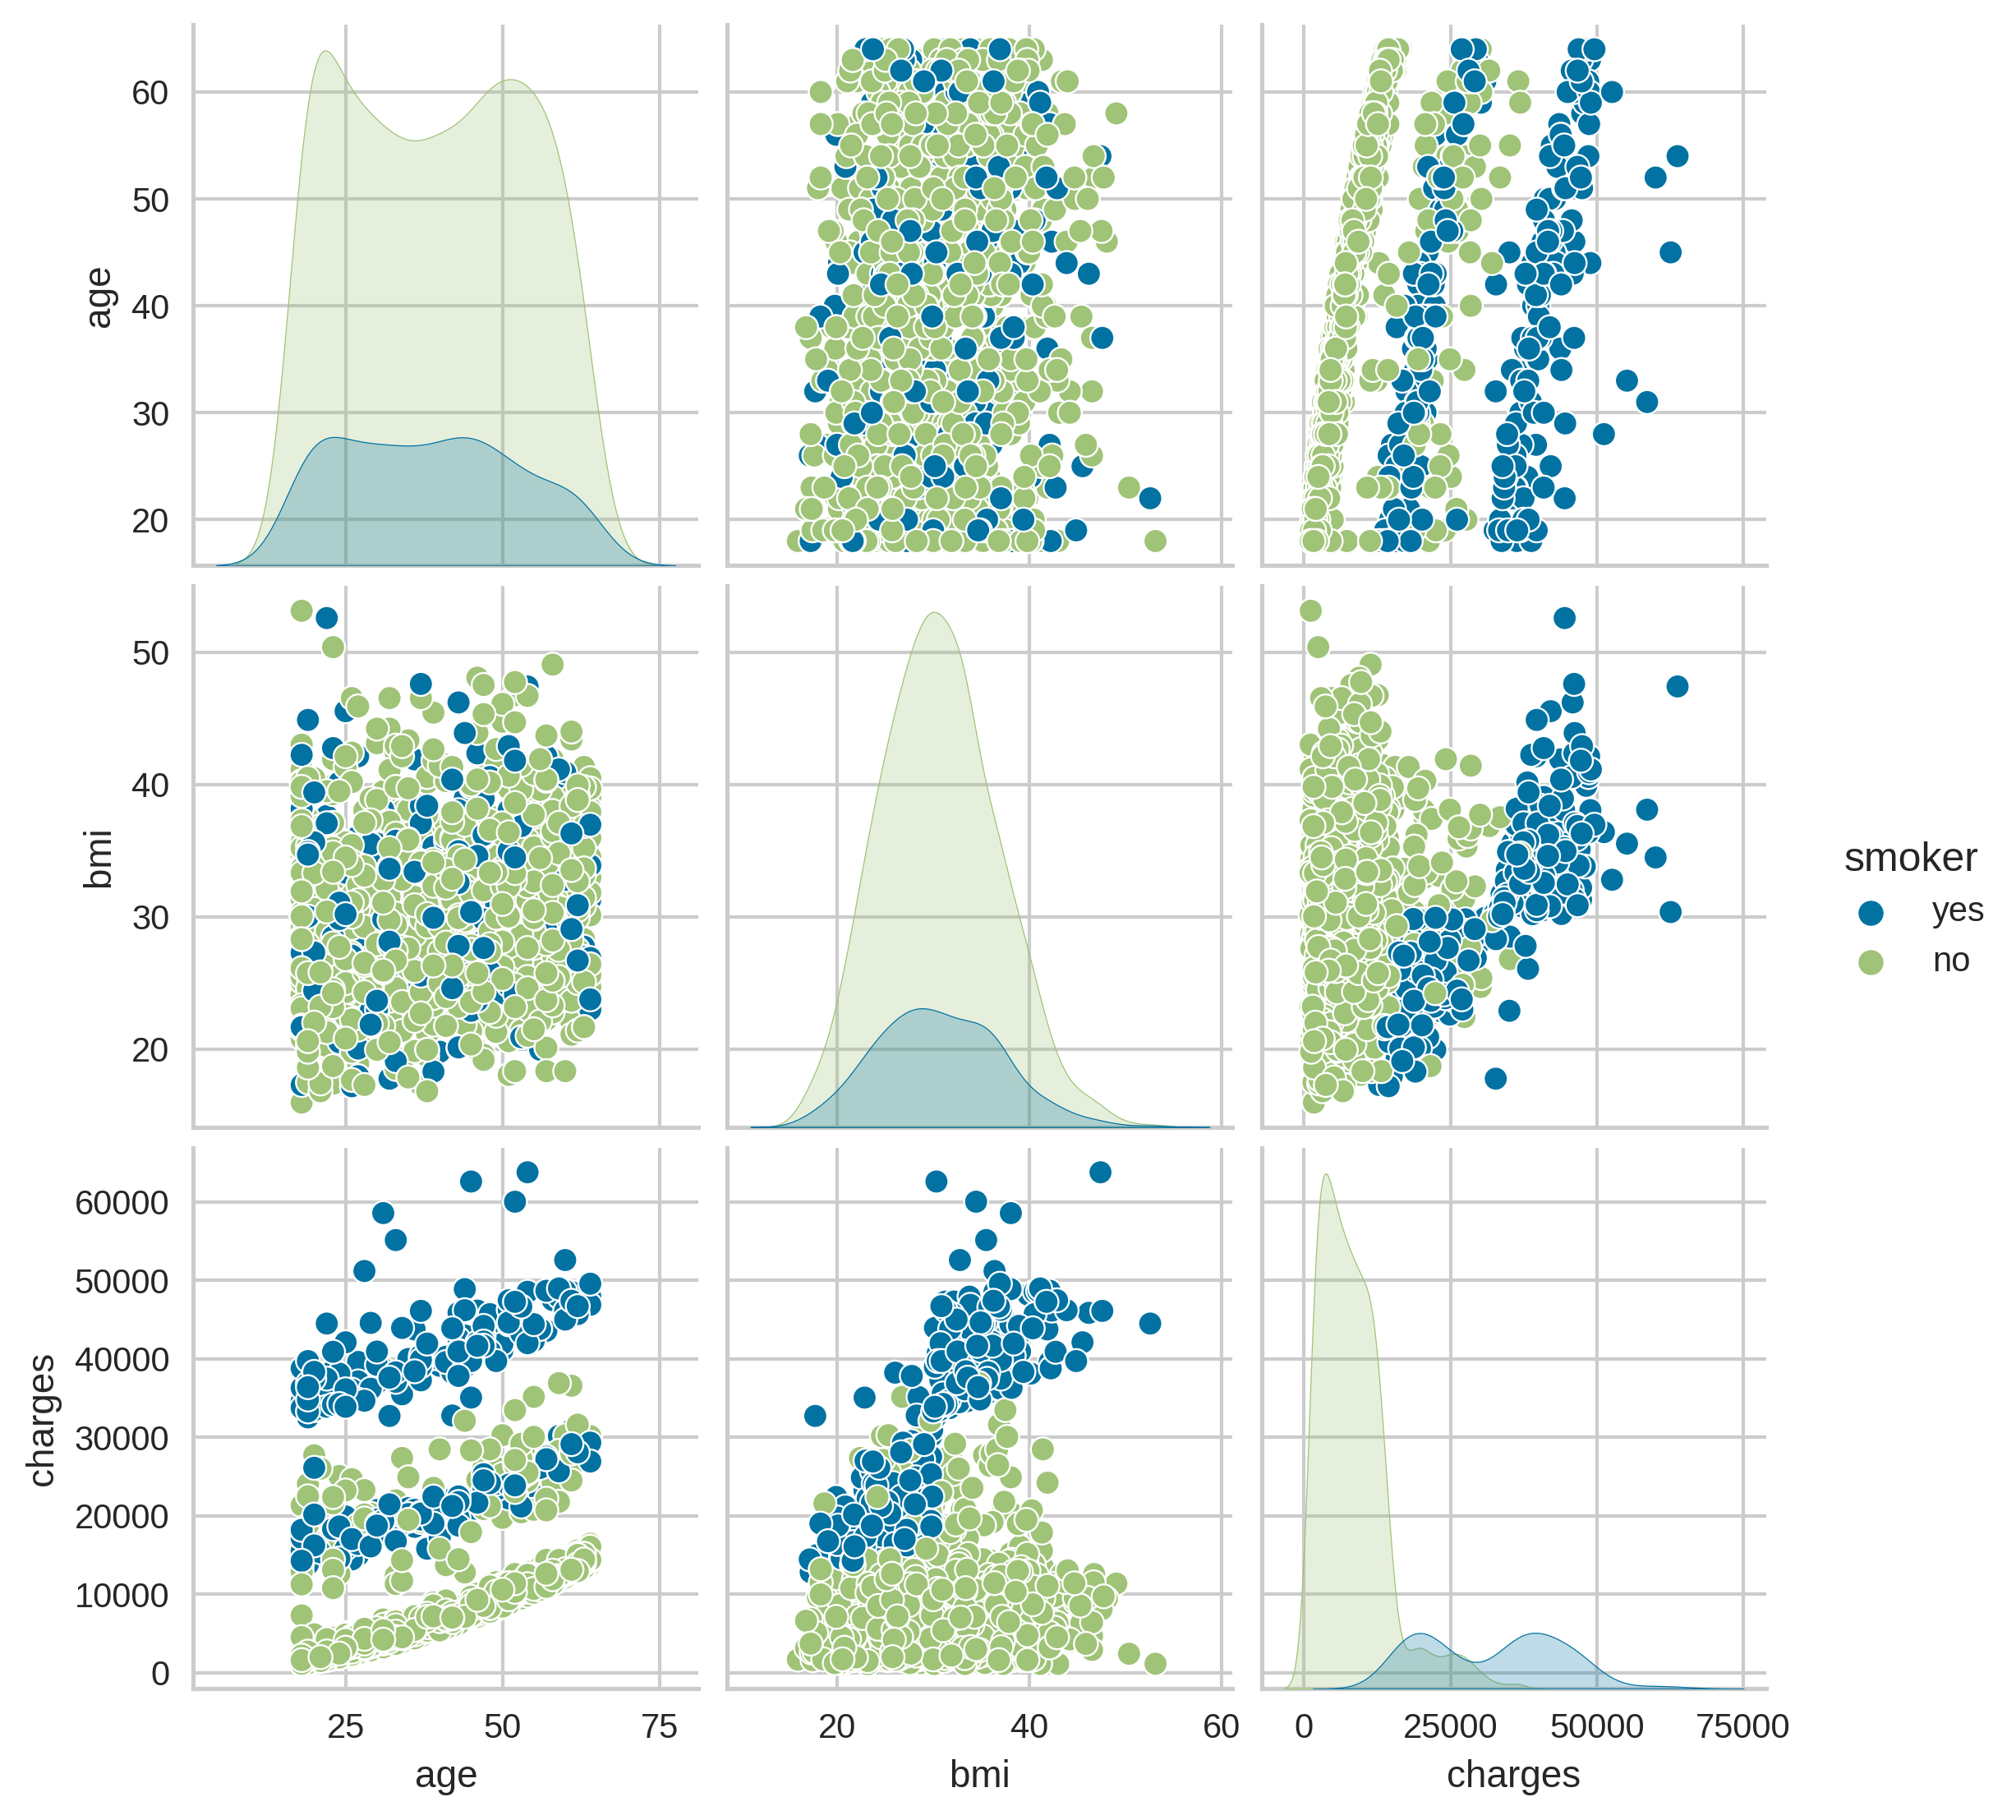

In [11]:
cols = ['age', 'bmi', 'charges', 'smoker']
sns.pairplot(data[cols], hue='smoker')
plt.show()


## Initializing the PyCaret Environment

In [12]:
reg = setup(data=data, target='charges', train_size = 0.8, session_id = 7402,
    numeric_features = numeric[:-1], categorical_features = categorical,
    transformation = True, normalize = True, transform_target = True)


,Description,Value
0,Session id,7402
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(1070, 10)"
6,Transformed test set shape,"(268, 10)"
7,Ordinal features,2
8,Numeric features,3
9,Categorical features,3


# Printing the Preprocessed Features

In [13]:
get_config('X').head()

,age,sex,bmi,children,smoker,region
989,24,female,20.520000,0,yes,northeast
734,59,female,32.099998,3,no,southwest
790,39,female,41.799999,0,no,southeast
1025,21,female,34.599998,0,no,southwest
1209,59,male,37.099998,1,no,southwest


## Printing the Processed Features


In [14]:
get_config('X_transformed').head()

,age,sex,bmi,children,smoker,region_northeast,region_southwest,region_southeast,region_northwest
989,-1.101651,-1.032297,-1.773173,-1.080649,2.017694,1.747292,-0.553599,-0.616964,-0.566558
734,1.359932,-1.032297,0.282258,1.358853,-0.495615,-0.572314,1.806363,-0.616964,-0.566558
790,0.038240,-1.032297,1.692765,-1.080649,-0.495615,-0.572314,-0.553599,1.620839,-0.566558
1025,-1.353821,-1.032297,0.666971,-1.080649,-0.495615,-0.572314,1.806363,-0.616964,-0.566558
1209,1.359932,0.968713,1.036003,0.290510,-0.495615,-0.572314,1.806363,-0.616964,-0.566558


Comparing Regression Models

In [15]:
best = compare_models(sort='RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2273.7184,22783663.7858,4745.9595,0.8354,0.3859,0.1873,0.4780
rf,Random Forest Regressor,2341.9428,22956141.1619,4763.5978,0.8352,0.4093,0.2083,0.7870
ada,AdaBoost Regressor,3303.8841,23590271.6119,4831.9821,0.8311,0.4796,0.4356,0.3270
lightgbm,Light Gradient Boosting Machine,2479.8073,23909978.6186,4855.8263,0.8282,0.4140,0.2108,0.5380
et,Extra Trees Regressor,2375.6444,24954136.8929,4968.8438,0.8190,0.4288,0.2157,0.6020
catboost,CatBoost Regressor,2500.9126,25028614.9295,4975.2381,0.8192,0.4080,0.2022,1.3130
knn,K Neighbors Regressor,3148.7110,30436451.4000,5492.0922,0.7817,0.4336,0.2676,0.2330
xgboost,Extreme Gradient Boosting,3005.9980,33599423.0000,5734.2586,0.7588,0.4424,0.2542,0.3530
dt,Decision Tree Regressor,2994.7452,41412765.8677,6403.1420,0.7006,0.5126,0.3165,0.2210
br,Bayesian Ridge,4061.5400,60135070.9442,7638.1699,0.5686,0.4400,0.2716,0.2440


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [16]:
model = create_model('gbr', fold = 10)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2324.8220,24607190.6537,4960.5635,0.8393,0.3810,0.1751
1,2567.1053,29243473.9965,5407.7236,0.7402,0.4391,0.2553
2,2507.5046,21882351.9485,4677.8576,0.8560,0.4264,0.2000
3,2566.8594,25584779.1485,5058.1399,0.8151,0.3939,0.1775
4,2170.5328,19076250.0766,4367.6367,0.8315,0.4227,0.2140
5,1986.4025,17513802.6716,4184.9495,0.9052,0.2879,0.1444
6,2552.0255,30095932.2995,5485.9760,0.8319,0.4120,0.1910
7,1904.3311,16102698.5634,4012.8168,0.8950,0.3101,0.1860
8,1789.5494,17458783.9564,4178.3710,0.8269,0.3299,0.1574


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Tuning the Model

In [17]:
params = {'learning_rate': [0.01, 0.02, 0.05],
'max_depth': [1,2, 3, 4, 5, 6, 7, 8],
'subsample': [0.4, 0.5, 0.6, 0.7, 0.8],
'n_estimators' : [100, 200, 300, 400, 500, 600]}

tuned_model = tune_model(model, optimize = 'RMSE', fold = 10,
custom_grid = params, n_iter = 100)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2221.9780,23481114.0656,4845.7315,0.8467,0.3680,0.1702
1,2416.5460,28307997.7103,5320.5261,0.7485,0.4233,0.2186
2,2345.4330,20333006.3535,4509.2135,0.8662,0.4070,0.1861
3,2215.2956,22511217.6037,4744.5988,0.8373,0.3893,0.1584
4,1954.9048,17301890.3581,4159.5541,0.8472,0.4099,0.1872
5,1878.6645,16865152.1380,4106.7204,0.9087,0.2812,0.1419
6,2475.4219,29048741.0322,5389.6884,0.8377,0.4139,0.1840
7,1853.1972,15822654.9701,3977.7701,0.8969,0.2958,0.1729
8,1729.1169,16179052.9599,4022.3194,0.8395,0.3222,0.1587


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


Making Predictions

In [18]:
#cols = ['age', 'bmi', 'children', 'sex_female', 'smoker_no','charges','Label']
predictions = predict_model(tuned_model)
predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,1937.1215,16815210.1418,4100.6353,0.8921,0.3304,0.1736


,age,sex,bmi,children,smoker,region,charges,prediction_label
1004,47,male,19.190001,1,no,northeast,10.963510,9173.396244
763,27,male,26.030001,0,no,northeast,9.500159,3821.651853
544,54,male,30.209999,0,no,northwest,11.211054,12112.290568
256,56,male,33.630001,0,yes,northwest,13.397961,43429.989203
1171,43,female,26.700001,2,yes,southwest,12.376355,23596.472169


Plotting the Model


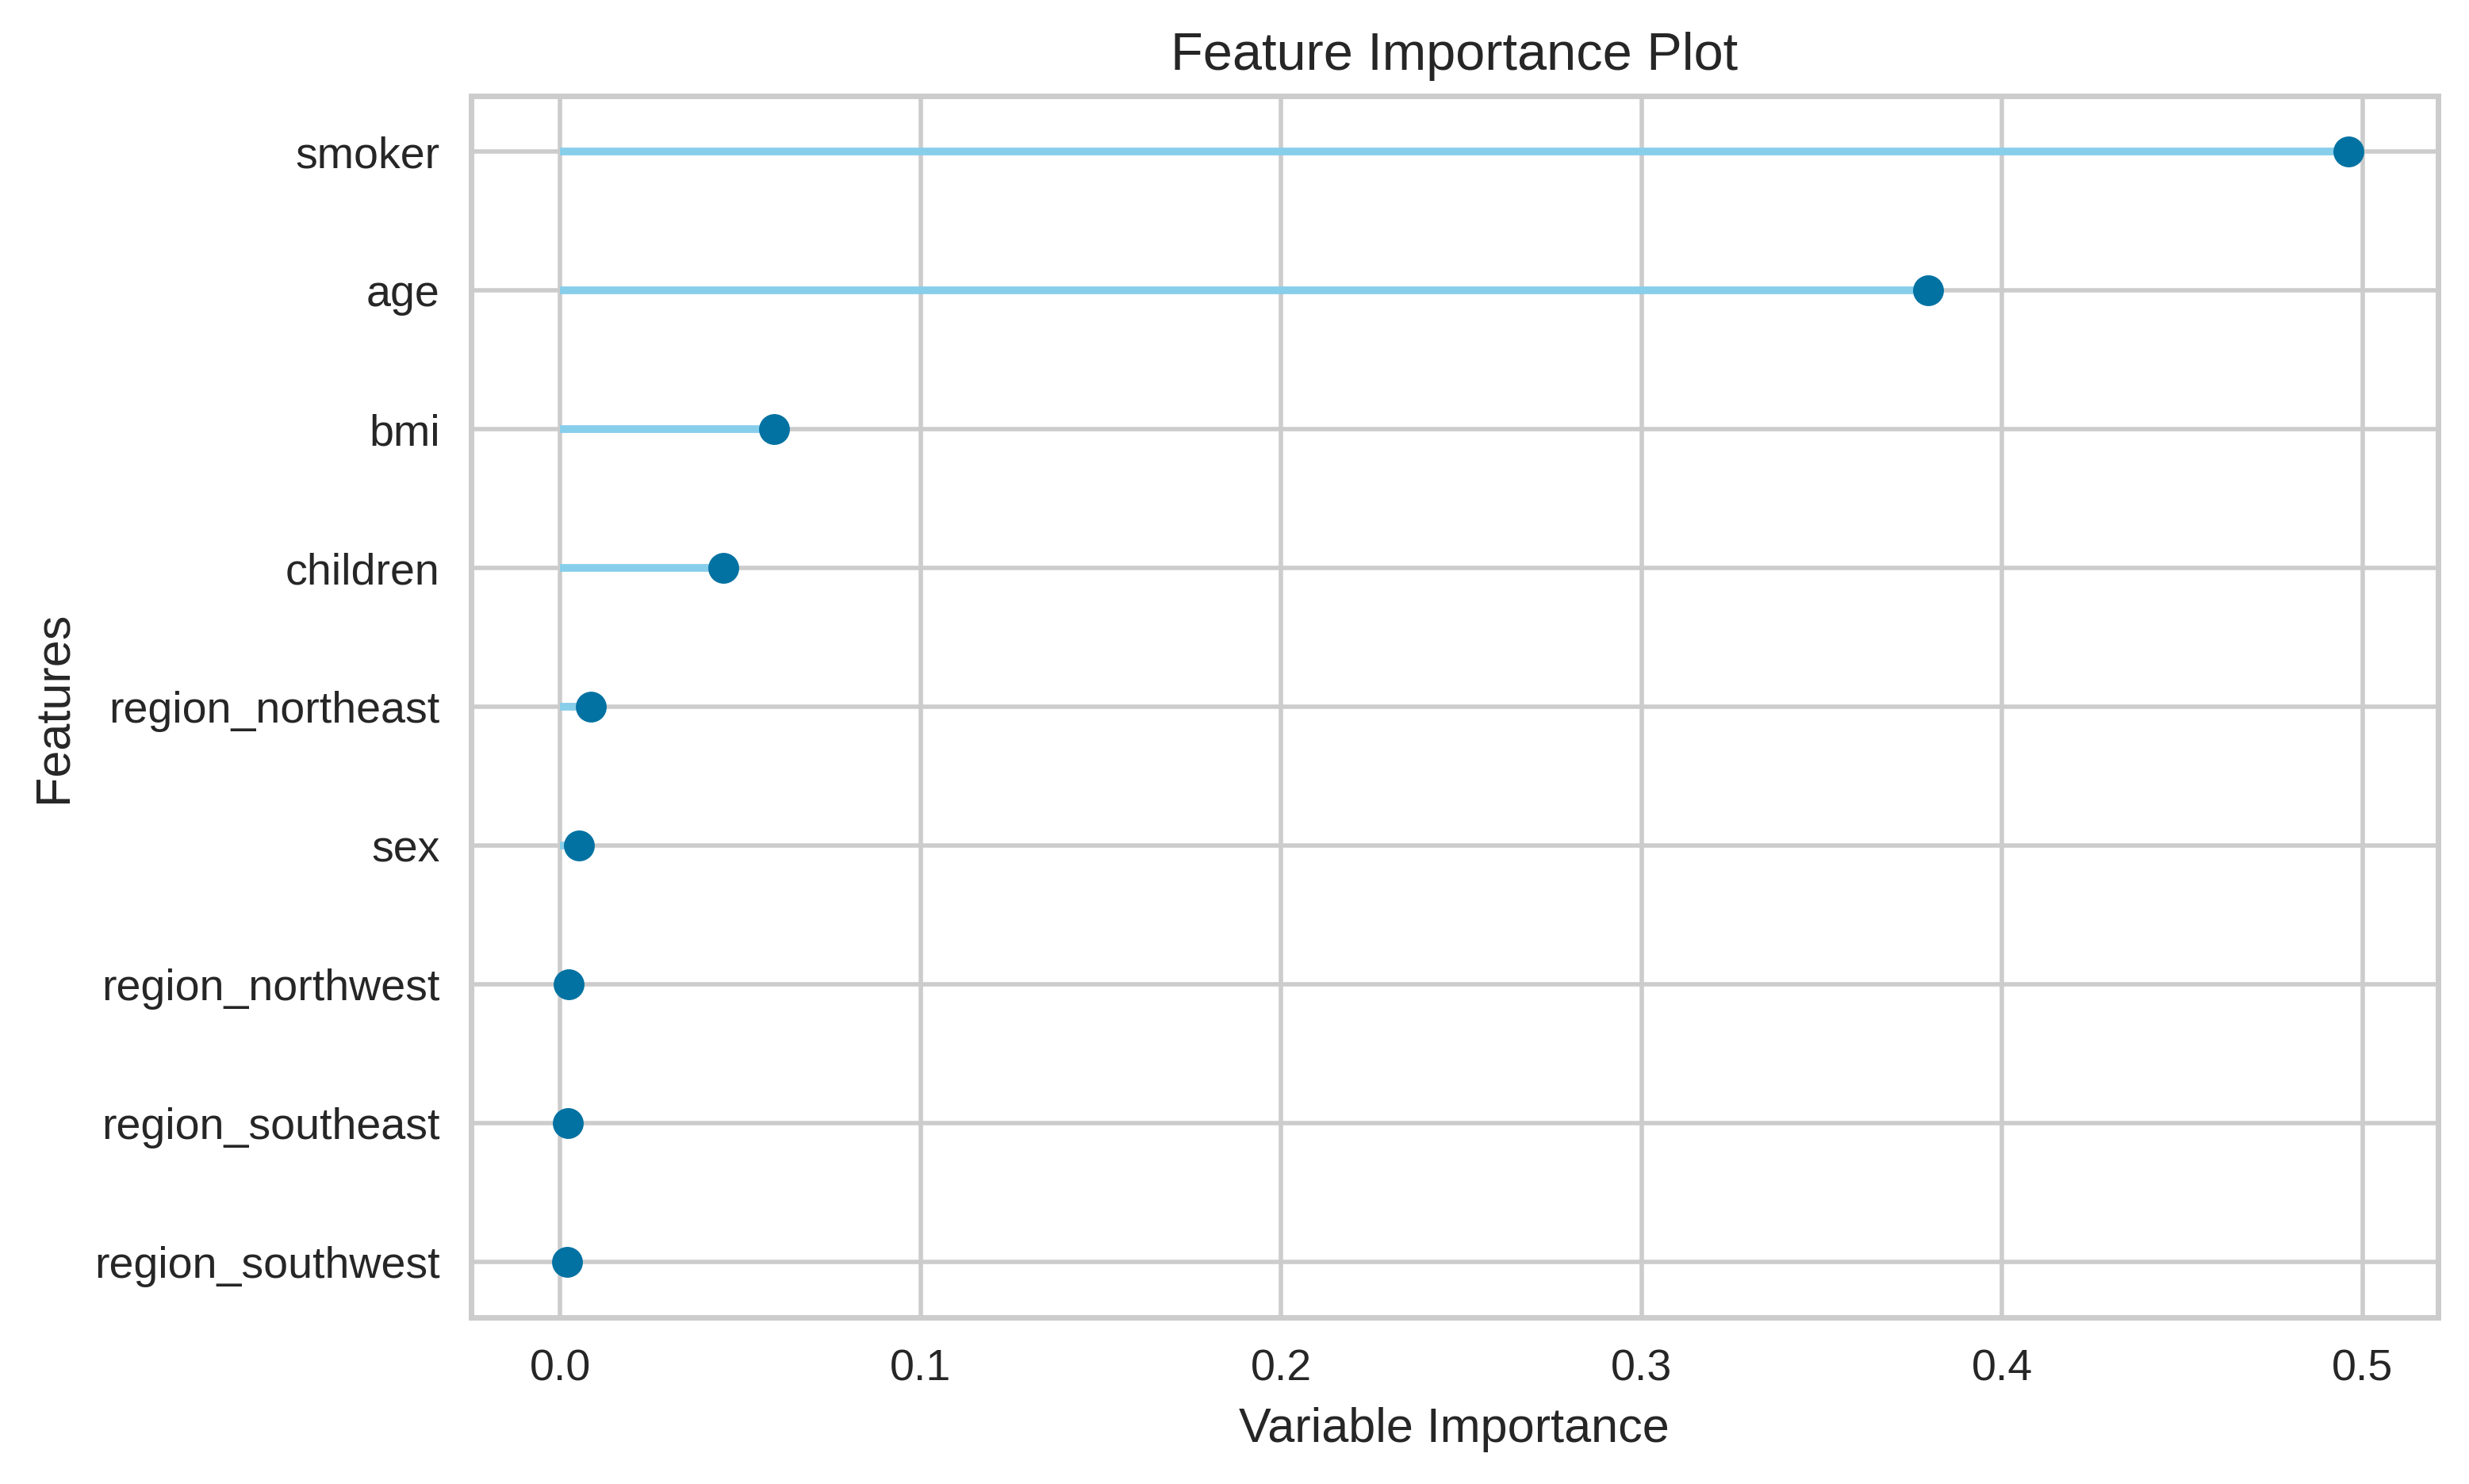

In [19]:
plot_model(tuned_model, 'feature', scale = 4)


# plotting error

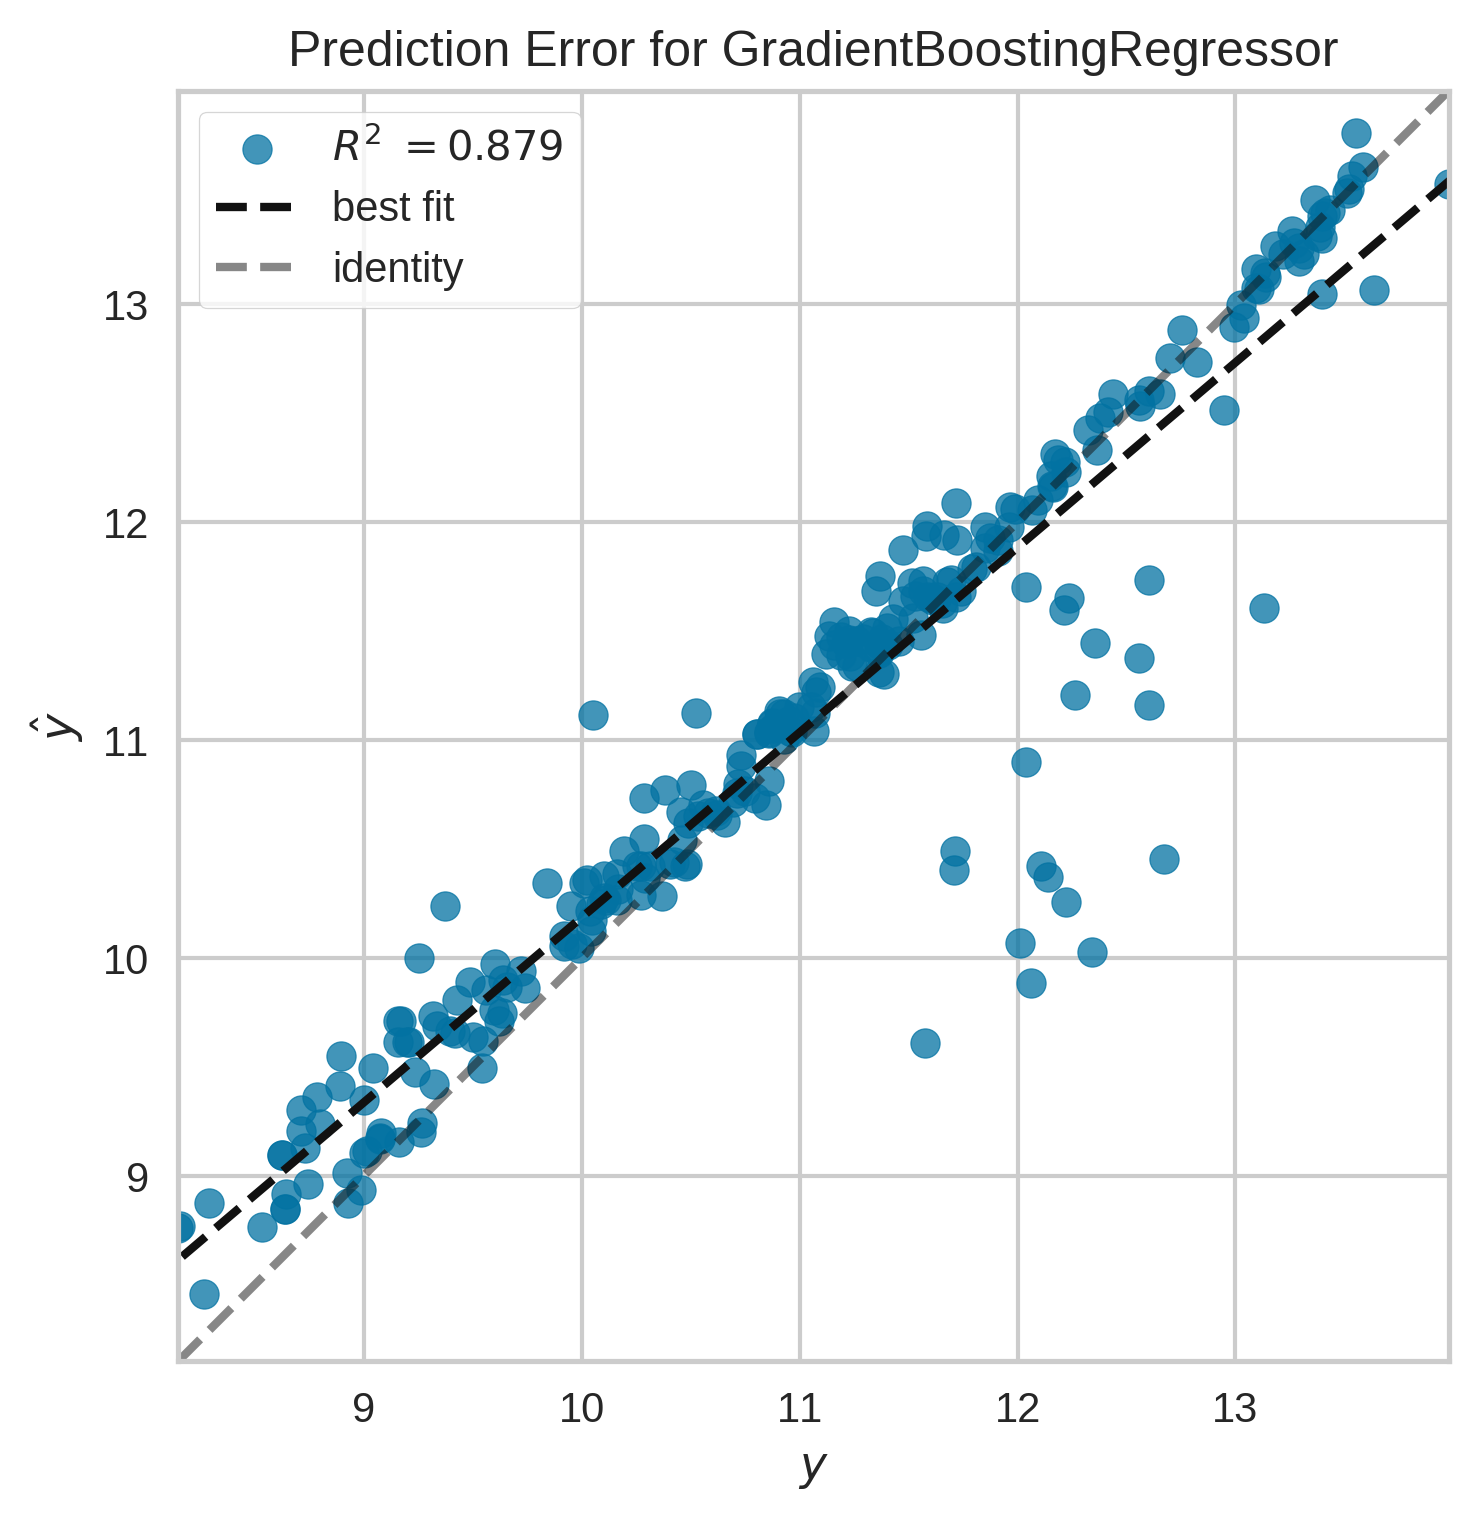

In [20]:
plot_model(model, 'error')

## finalising and saving the model

In [21]:
final_model = finalize_model(tuned_model)

save_model(final_model, 'regression_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('target_transformation',
                  TransformerWrapperWithInverse(transformer=TargetTransformer(estimator=PowerTransformer(standardize=False)))),
                 ('numerical_imputer',
                  TransformerWrapper(include=['age', 'bmi', 'children'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['smoke...
                                     transformer=OneHotEncoder(cols=['region'],
                                                               handle_missing='return_nan',
                                                               use_cat_names=True))),
                 ('transformation',
                  TransformerWrapper(transformer=PowerTransformer(standardize=False))),
                 ('normalize', TransformerWrapper(transformer=StandardScaler())),
                 ('actual_estimator',